In [12]:
pip install polars

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 9.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [10]:

pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl

plt.style.use('dark_background')


In [17]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")
oil = pd.read_csv("Data/oil.csv")
stores = pd.read_csv("Data/stores.csv")
transactions = pd.read_csv("Data/transactions.csv")
holidays_events = pd.read_csv("Data/holidays_events.csv")
sample_submission = pd.read_csv("Data/sample_submission.csv")


In [20]:
train

,id,date,store_nbr,family,sales,onpromotion,test
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,0
1,1,2013-01-01,1,BABY CARE,0.000,0,0
2,2,2013-01-01,1,BEAUTY,0.000,0,0
3,3,2013-01-01,1,BEVERAGES,0.000,0,0
4,4,2013-01-01,1,BOOKS,0.000,0,0
...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,0
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,0
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,0


In [21]:
test

,id,date,store_nbr,family,onpromotion,test
0,3000888,2017-08-16,1,AUTOMOTIVE,0,1
1,3000889,2017-08-16,1,BABY CARE,0,1
2,3000890,2017-08-16,1,BEAUTY,2,1
3,3000891,2017-08-16,1,BEVERAGES,20,1
4,3000892,2017-08-16,1,BOOKS,0,1
...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0,1
28509,3029397,2017-08-31,9,PRODUCE,1,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,1


In [22]:
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [23]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [24]:
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [26]:
holidays_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [27]:
sample_submission

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
...,...,...
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0


In [28]:
test['test'] = 1
train['test'] = 0
df = pd.concat([train, test], axis=0)

In [29]:
df

,id,date,store_nbr,family,sales,onpromotion,test
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0
1,1,2013-01-01,1,BABY CARE,0.0,0,0
2,2,2013-01-01,1,BEAUTY,0.0,0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0,0
4,4,2013-01-01,1,BOOKS,0.0,0,0
...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,NaN,1,1
28508,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,1
28509,3029397,2017-08-31,9,PRODUCE,NaN,1,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,1


In [30]:
df.isna().mean()

id             0.000000
date           0.000000
store_nbr      0.000000
family         0.000000
sales          0.009412
onpromotion    0.000000
test           0.000000
dtype: float64

In [31]:
df.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
test             int64
dtype: object

# Data analysis and vizualization

In [34]:
def datetime(df):
    df['date'] = pd.to_datetime(df["date"])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.day_of_week
    df['day_name'] = df['date'].dt.day_name()
    df['quarter'] = df['date'].dt.quarter
    df['is_leap_year'] = df['date'].dt.is_leap_year
    return df

In [35]:
df = datetime(df)

In [38]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,test,year,month,day,day_of_week,day_name,quarter,is_leap_year
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,2013,1,1,1,Tuesday,1,False
1,1,2013-01-01,1,BABY CARE,0.0,0,0,2013,1,1,1,Tuesday,1,False
2,2,2013-01-01,1,BEAUTY,0.0,0,0,2013,1,1,1,Tuesday,1,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,0,2013,1,1,1,Tuesday,1,False
4,4,2013-01-01,1,BOOKS,0.0,0,0,2013,1,1,1,Tuesday,1,False


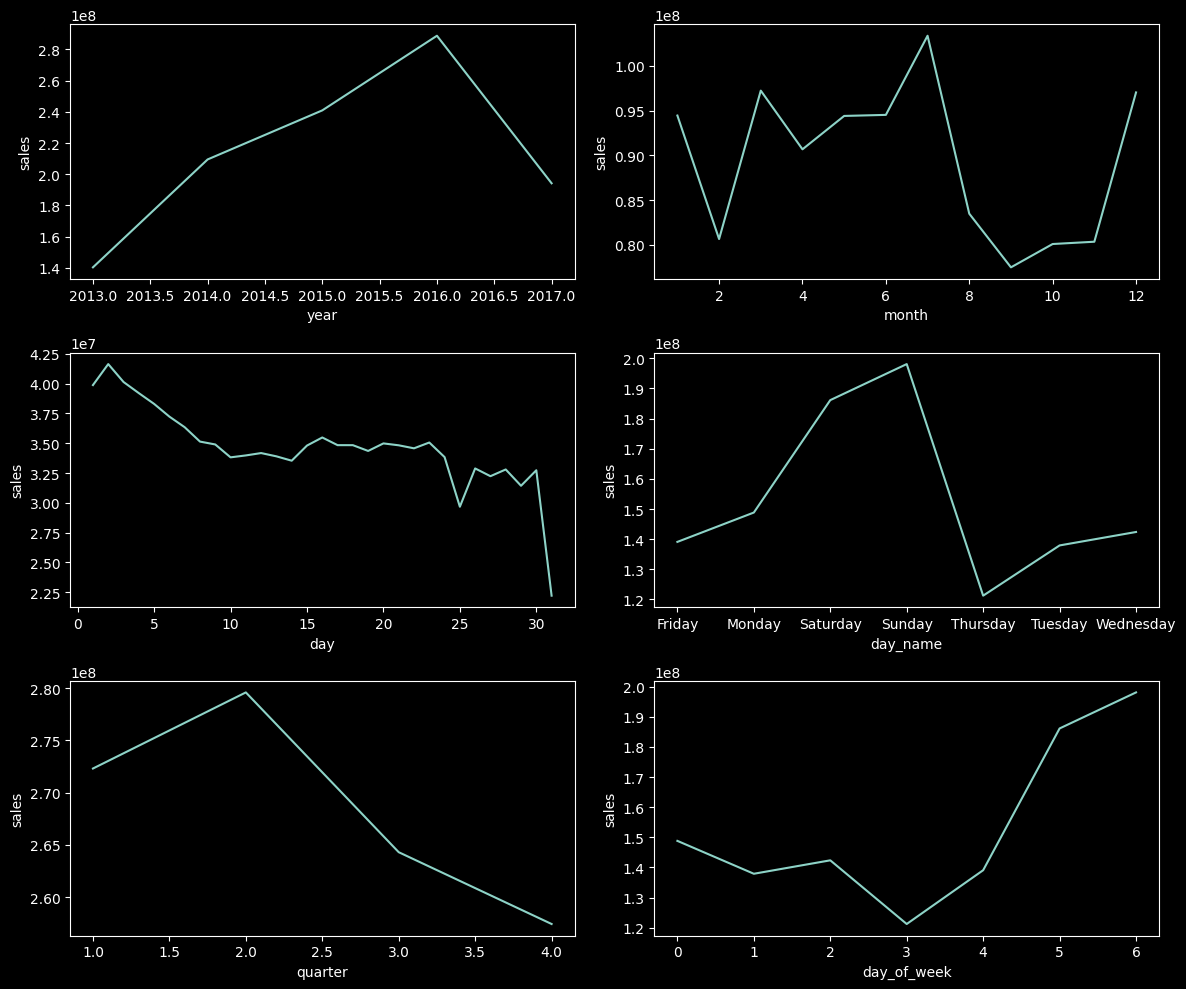

In [39]:
grouping_columns = ['year', 'month', 'day', 'day_name', 'quarter', 'day_of_week']

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for ind, column in enumerate(grouping_columns):
    grouped_data = df.groupby(column)['sales'].sum()
    grouped_data = pd.DataFrame(grouped_data).reset_index()

    sns.lineplot(data=grouped_data, x=column, y='sales', ax=axes[ind])

plt.tight_layout()
plt.show()

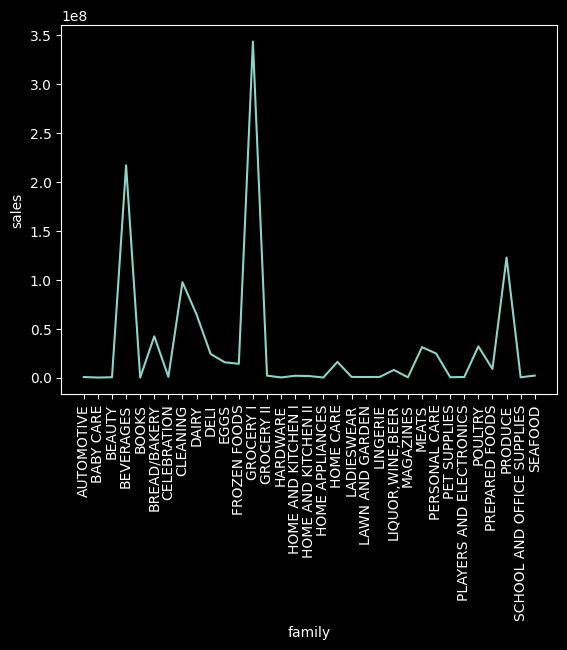

In [44]:
grouped_data = df.groupby('family')['sales'].sum().reset_index()

sns.lineplot(data=grouped_data, x='family', y='sales')

ax = plt.gca()
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [47]:
pd.DataFrame(df.groupby('year')['sales'].sum()).reset_index().sort_values(by='sales', ascending=False)

,year,sales
3,2016,2.886545e+08
2,2015,2.408801e+08
1,2014,2.094742e+08
4,2017,1.942171e+08
0,2013,1.404190e+08


<Axes: xlabel='store_nbr', ylabel='sales'>

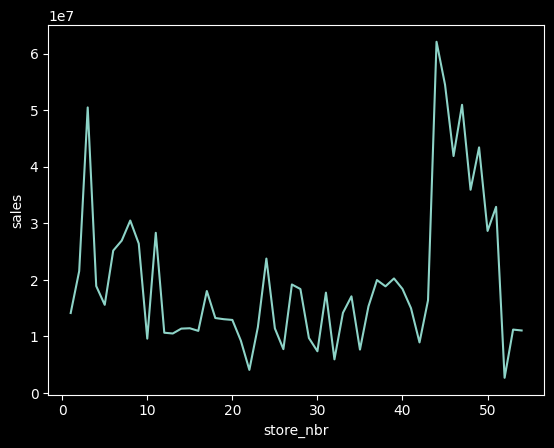

In [48]:
best_store = df.groupby('store_nbr')['sales'].sum().reset_index()

bs_sorted = best_store.sort_values(by='sales', ascending=False)

sns.lineplot(data=bs_sorted, x='store_nbr', y='sales')

In [49]:
best_city = pd.merge(bs_sorted, stores, on='store_nbr', how='left')

best_city['ratio'] = 0

for city in best_city['city'].unique():
    ratio = len(best_city.loc[best_city['city'] == city]) / len(best_city)
    best_city.loc[best_city['city'] == city, 'ratio'] = ratio

best_city.head()

,store_nbr,sales,city,state,type,cluster,ratio
0,44,6.208755e+07,Quito,Pichincha,A,5,0.333333
1,45,5.449801e+07,Quito,Pichincha,A,11,0.333333
2,47,5.094831e+07,Quito,Pichincha,A,14,0.333333
3,3,5.048191e+07,Quito,Pichincha,D,8,0.333333
4,49,4.342010e+07,Quito,Pichincha,A,11,0.333333


In [50]:
best_city.sort_values(by='sales', ascending=True).head()

,store_nbr,sales,city,state,type,cluster,ratio
53,52,2.696170e+06,Manta,Manabi,A,11,0.037037
52,22,4.090202e+06,Puyo,Pastaza,C,7,0.018519
51,32,5.951796e+06,Guayaquil,Guayas,C,3,0.148148
50,30,7.382074e+06,Guayaquil,Guayas,C,3,0.148148
49,35,7.676679e+06,Playas,Guayas,C,3,0.018519


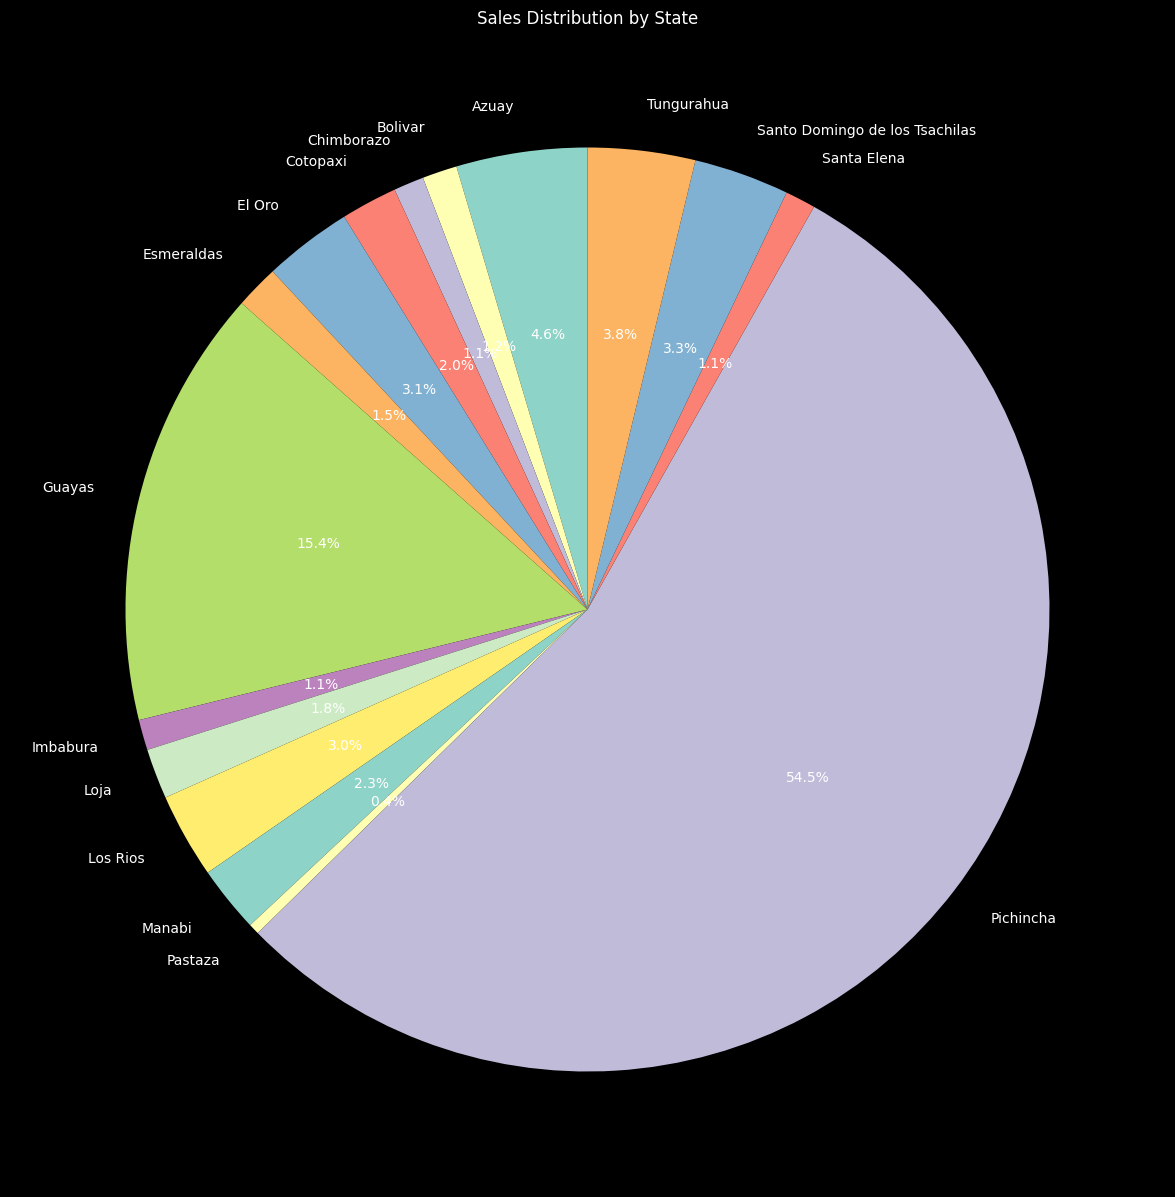

In [51]:
data = best_city.groupby('state')['sales'].sum()

plt.figure(figsize=(15, 15))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)

plt.title('Sales Distribution by State')

plt.show()

In [52]:
best_city.groupby('city')['ratio'].apply(lambda x: x[0:1])/best_city.groupby('city')['sales'].sum()

city             
Ambato         9     9.189328e-10
Babahoyo       24    1.043481e-09
Cayambe        10    6.537742e-10
Cuenca         16    1.129899e-09
Daule          18    9.651083e-10
El Carmen      40    1.674750e-09
Esmeraldas     26    1.129750e-09
Guaranda       33    1.419097e-09
Guayaquil      7     1.204777e-09
Ibarra         36    1.617158e-09
Latacunga      42    1.748493e-09
Libertad       28    1.208589e-09
Loja           20    9.818939e-10
Machala        21    1.109332e-09
Manta          39    2.662172e-09
Playas         49    2.412308e-09
Puyo           52    4.527532e-09
Quevedo        30    1.306098e-09
Quito          0     5.987215e-10
Riobamba       38    1.626155e-09
Salinas        37    1.621445e-09
Santo Domingo  27    1.550345e-09
dtype: float64

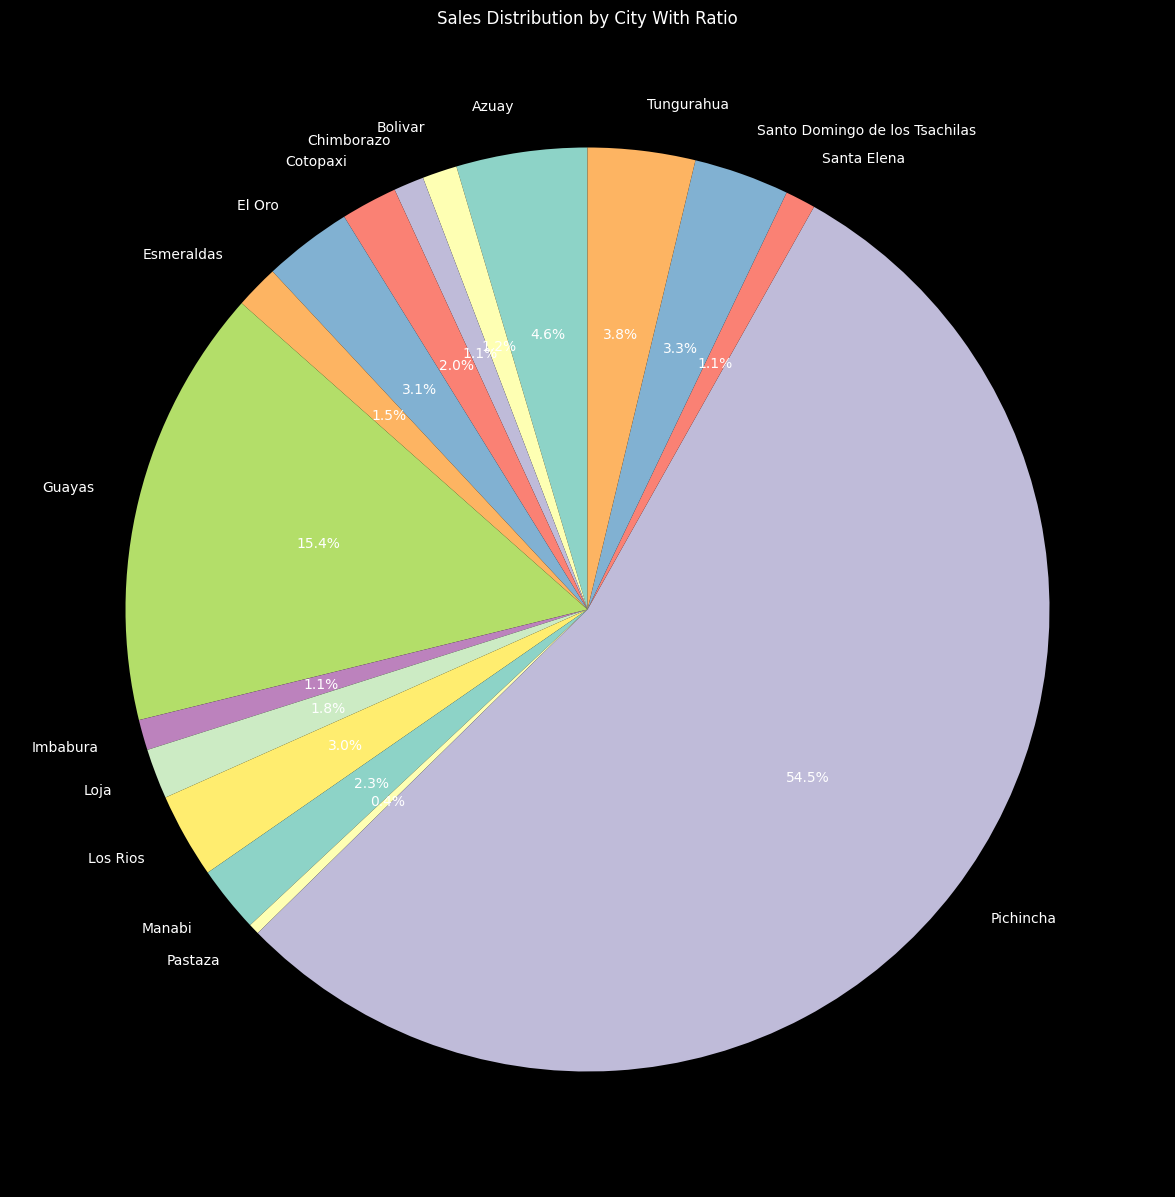

In [53]:
best_city.groupby('city')['ratio'].apply(lambda x: x[0:1])/best_city.groupby('city')['sales'].sum()

plt.figure(figsize=(15, 15))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)

plt.title('Sales Distribution by City With Ratio')

plt.show()

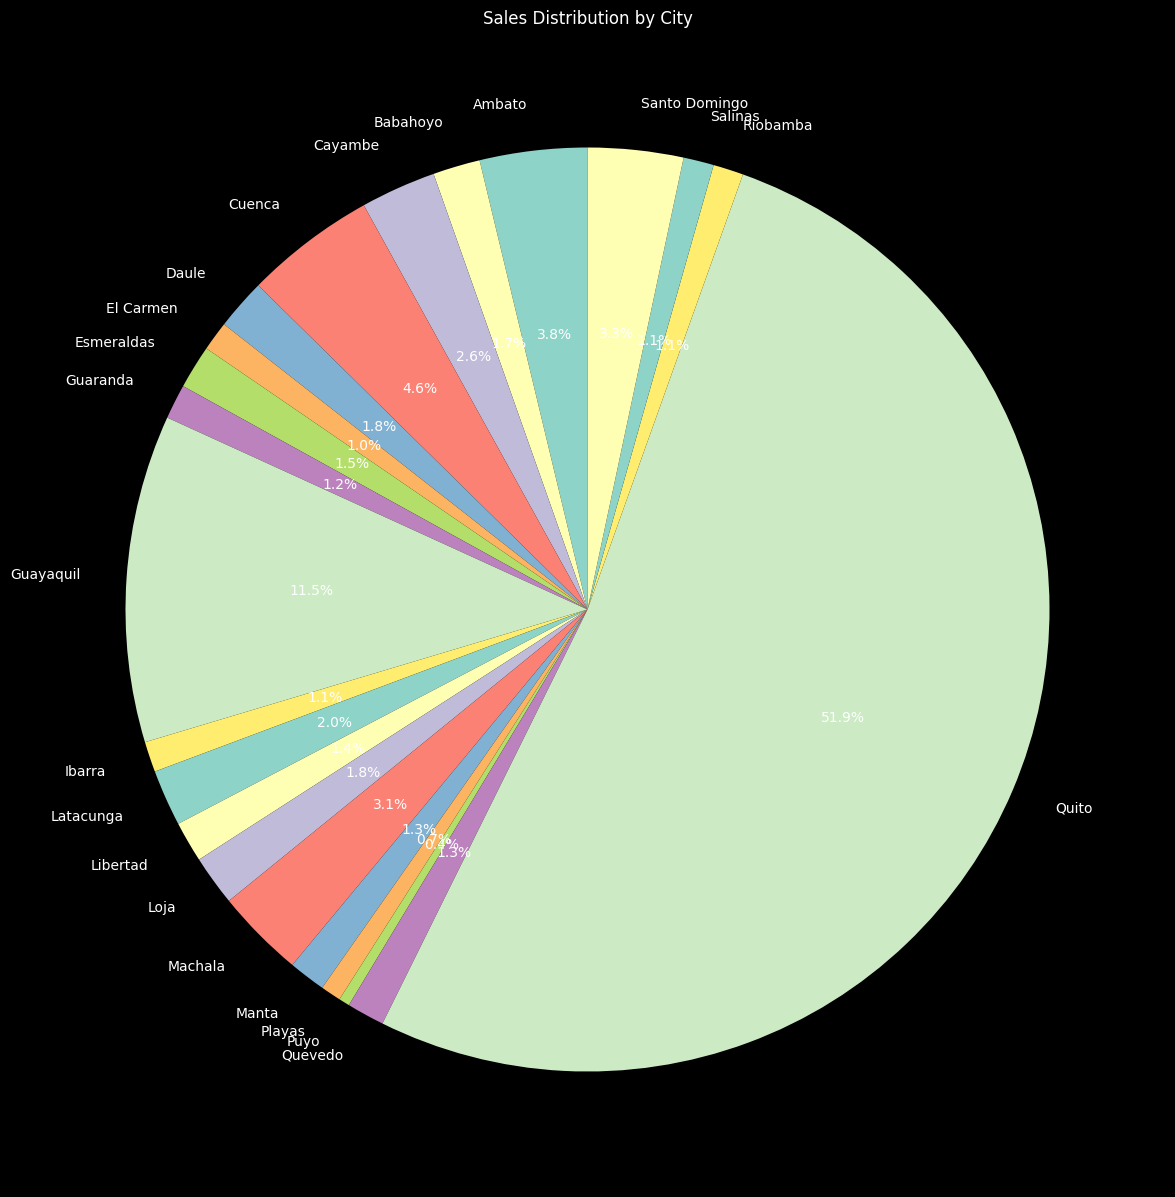

In [54]:
data = best_city.groupby('city')['sales'].sum()

plt.figure(figsize=(15, 15))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)

plt.title('Sales Distribution by City')

plt.show()

In [55]:
df = pd.merge(df, stores, how='left', on='store_nbr')

In [56]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,test,year,month,day,day_of_week,day_name,quarter,is_leap_year,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,2013,1,1,1,Tuesday,1,False,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,0,2013,1,1,1,Tuesday,1,False,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,0,2013,1,1,1,Tuesday,1,False,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,0,2013,1,1,1,Tuesday,1,False,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,0,2013,1,1,1,Tuesday,1,False,Quito,Pichincha,D,13


In [57]:
pd.DataFrame(df.groupby('cluster')['sales'].sum()).reset_index().sort_values(by='sales', ascending=True).head(10)

,cluster,sales
15,16,1.325938e+07
6,7,1.547812e+07
11,12,1.803097e+07
1,2,2.891640e+07
8,9,3.056108e+07
16,17,3.291149e+07
3,4,4.944344e+07
0,1,5.437675e+07
14,15,5.529695e+07
4,5,6.208755e+07


In [58]:
holidays_events['date'] = pd.to_datetime(holidays_events["date"])
df = pd.merge(df, holidays_events, how='left', on='date')
df_non_nan = df.dropna(subset=['locale'])
df_non_nan.head()

,id,date,store_nbr,family,sales,onpromotion,test,year,month,day,...,is_leap_year,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,2013,1,1,...,False,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,0,2013,1,1,...,False,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,0,2013,1,1,...,False,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,0,2013,1,1,...,False,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,0,2013,1,1,...,False,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False


In [59]:
df_non_nan['type_y'].value_counts()

type_y
Holiday       306504
Event          99792
Additional     67716
Transfer       16038
Work Day        8910
Bridge          5346
Name: count, dtype: int64

In [60]:
df_non_nan['locale'].value_counts()

locale
National    261954
Local       210276
Regional     32076
Name: count, dtype: int64

In [61]:
df_non_nan.groupby(['type_y', 'family'])['sales'].sum()

type_y      family                    
Additional  AUTOMOTIVE                    1.496400e+04
            BABY CARE                     3.050000e+02
            BEAUTY                        9.801000e+03
            BEVERAGES                     6.183568e+06
            BOOKS                         3.100000e+02
                                              ...     
Work Day    POULTRY                       9.566624e+04
            PREPARED FOODS                2.989535e+04
            PRODUCE                       2.425016e+05
            SCHOOL AND OFFICE SUPPLIES    1.520000e+02
            SEAFOOD                       6.645205e+03
Name: sales, Length: 198, dtype: float64

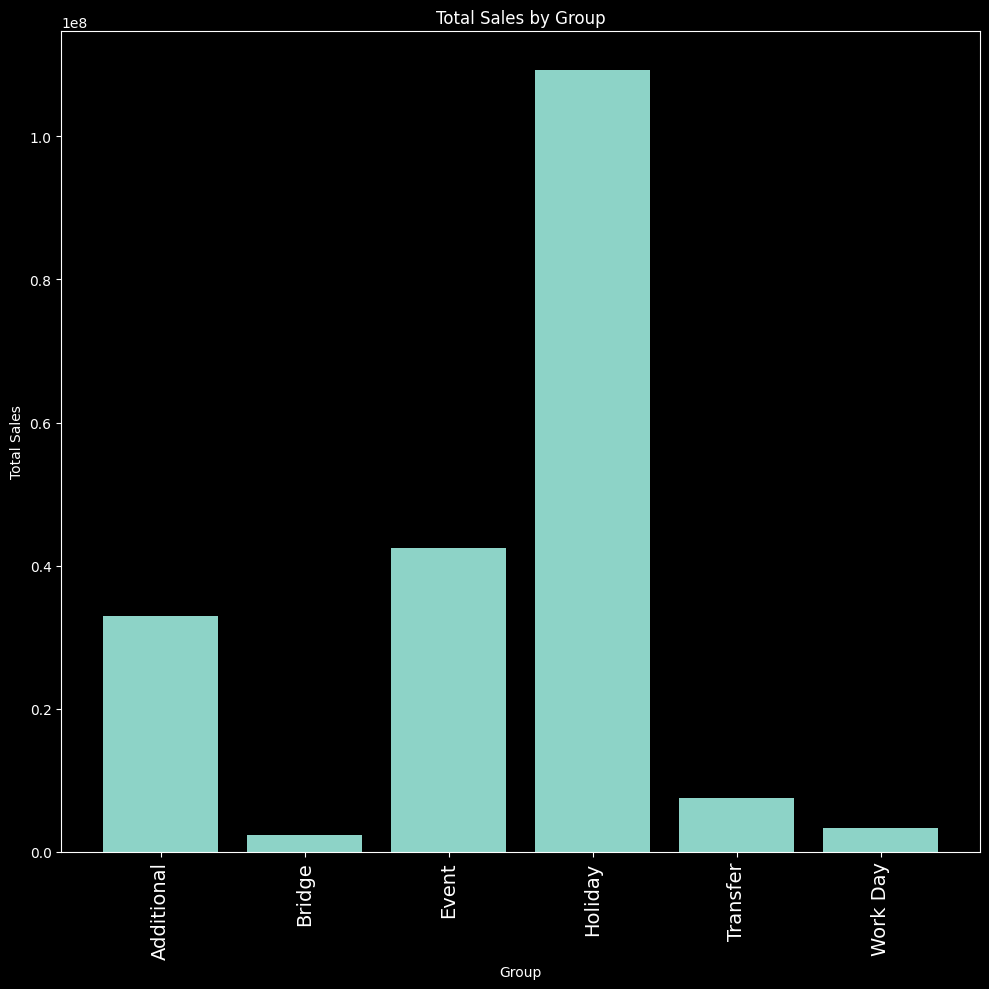

In [62]:
grouped_data = df_non_nan.groupby(['type_y'])['sales'].sum()

grouped_data = grouped_data.reset_index()

plt.figure(figsize=(10, 10))
plt.bar(range(len(grouped_data)), grouped_data['sales'])
plt.xlabel('Group')
plt.ylabel('Total Sales')
plt.title('Total Sales by Group')
plt.xticks(range(len(grouped_data)), grouped_data['type_y'], rotation=90, fontsize=14)
plt.tight_layout()
plt.show()

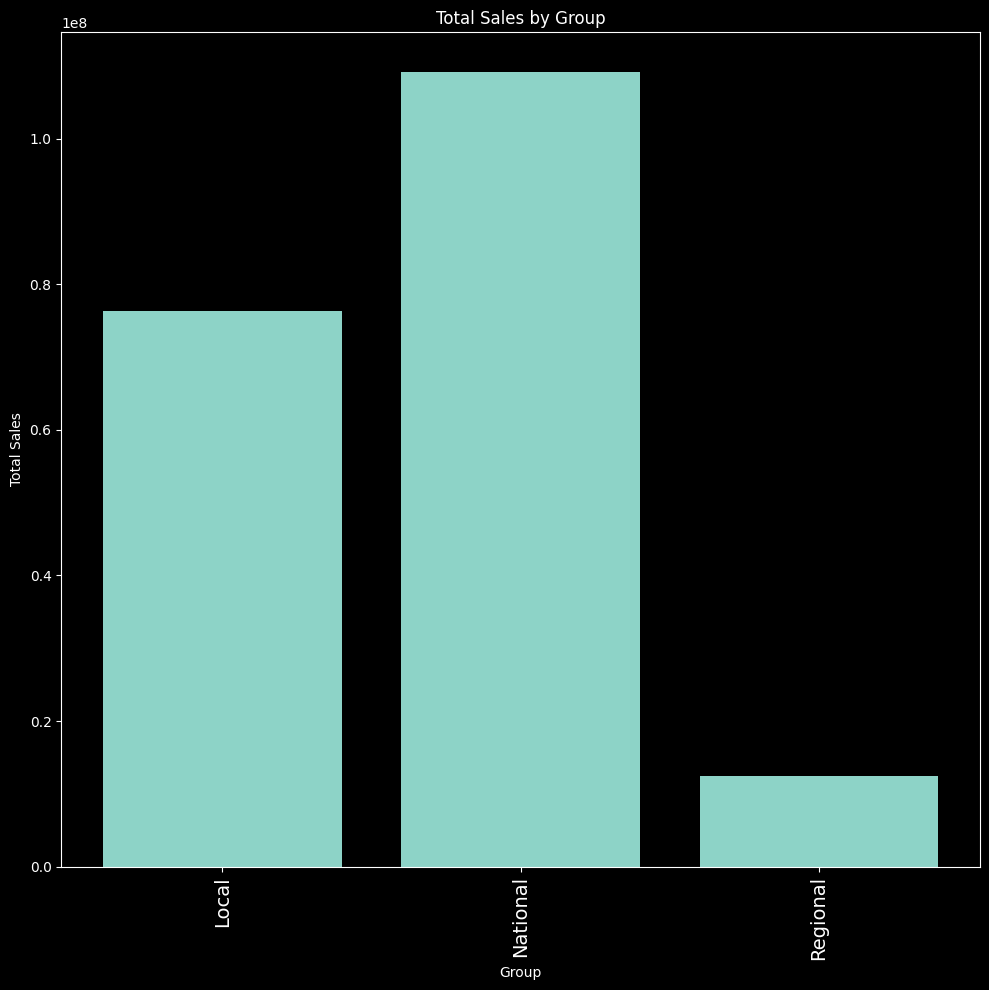

In [63]:
grouped_data = df_non_nan.groupby(['locale'])['sales'].sum()

grouped_data = grouped_data.reset_index()

plt.figure(figsize=(10, 10))
plt.bar(range(len(grouped_data)), grouped_data['sales'])
plt.xlabel('Group')
plt.ylabel('Total Sales')
plt.title('Total Sales by Group')
plt.xticks(range(len(grouped_data)), grouped_data['locale'], rotation=90, fontsize=14)
plt.tight_layout()
plt.show()

In [64]:
df_non_nan[df_non_nan['transferred'] == True].groupby('locale')['sales'].sum()

locale
Local       1.489146e+06
National    3.507657e+06
Name: sales, dtype: float64